# Repülőjegy árának becslése

### Solution
<p>Segíti a felhasználót egy olyan időpont kitűzésében egyes városokba utazás céljából, amikor a repjegyek ára alacsony szokott lenni.<br>
Bizonyos értelemben predikcióval szolgál abból a szempontból is, hogy segít megítélni mikor utaznak általában a legkevesebben arra a helyre, mikor nincs "szezon". Ezt abból a feltevésből következtetjük, hogy szezon idején felmennek az árak.</p>

### Eredeti ötlet, megvalósítás
>Az eredeti ötlet alapján, előző éves adatokat ábrázolva illesztettem volna függvényt hibával, amiről a következő évre tudtam volna egy intervalluum becslést adni.

<p>Később átgondolva a feladatot, arra jutottam, hogy a 2020-as események és a gazdaság alakulása miatt, nem érdemes sok évre visszamenőleg adatokat elemezni, így viszont kevés adatpontra a függvényillesztés nem optimális.
    A fenti megfontolásból, <strong>az adatok átlagát és az inflációs rátát</strong> figyelembe véve adtam becslést.</p>

### Lépések
- A megfelelő csomagok importálása után, az adatokat beolvassuk a data.csv-ből.
    - Többszörös indexelés

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data.csv", index_col=[0,1], skipinitialspace=True)
df

Berlin  Copenhagen  Dublin  Lisbon  London  Madrid  Paris   Rome  \
year month                                                                     
2021 1       24200       29900   26780   38300   20800   26900  23890  18310   
     2       23100       32000   28200   42100   21430   28540  23400  16320   
     3       20040       27060   25300   39870   20870   34600  22340  17200   
     4       19600       21890   26740   40010   15060   33050  19510  27530   
     5       19110       20400   29000   39980   10800   34670  33300  30860   
     6       21000       19800   32790   44230   14670   45870  32820  21650   
     7       21800       31230   33280   45870   17890   46820  26870  16780   
     8       24800       34560   42310   50300   38650   48900  48970  34300   
     9       17300       25600   22200   43500   22540   38970  34600  26900   
     10      12400       26570   18760   38900   20900   34780  26980  24980   
     11      29700       31290   26050   43610   23200   38970  36780  19890   
     12      31500       41230   33450   54670   32600   48600  42310  22580   
2022 1       26300       31200   27800   41200   21800   34500  25600  18900   
     2       24200       34020   32200   43620   22500   32540  23100  18010   
     3       20100       28600   24610   40340   21760   37020  23510  16870   
     4       21900       26780   28540   39760   18720   36020  20980  28650   
     5       20080       21400   30900   40120   13670   39700  33120  34230   
     6       22400       20300   34670   46520   16800   49900  35600  23800   
     7       22900       33670   38740   47900   19560   53460  31800  19200   
     8       25200       36520   45600   55120   42350   55830  53460  38560   
     9       18200       26870   24030   44500   24700   47560  36340  28710   
     10      14200       28700   19400   45300   23650   38700  29800  31800   
     11      31900       34030   27800   44530   24500   40460  38700  20900   
     12      32300       43020   36200   58200   34210   50000  47600  24670   

            Stockholm  
year month             
2021 1          17860  
     2          28620  
     3          34500  
     4          28710  
     5          21340  
     6          23980  
     7          22300  
     8          29750  
     9          15640  
     10         20900  
     11         27300  
     12         35760  
2022 1          19400  
     2          24520  
     3          36200  
     4          28900  
     5          22300  
     6          27100  
     7          26900  
     8          31350  
     9          18300  
     10         22450  
     11         26980  
     12         39100

Az adathalmazban szereplő városok:

In [4]:
months = pd.Series(['Január','Február','Március','Április','Május','Június','Július','Augusztus','Szeptember','Október','November','December'],
                 index=[1,2,3,4,5,6,7,8,9,10,11,12])

cities = df.columns.values

print("Városok:", *cities, sep=', ')

Városok:, Berlin, Copenhagen, Dublin, Lisbon, London, Madrid, Paris, Rome, Stockholm


In [5]:
city = input('Választott város: ')
if city not in cities: print("Nem megfelelő")
#df[city]

Választott város: Lisbon


- A választott városra megmondjuk, melyik hónapban a legolcsóbb utazni:
    - Tömbökbe gyűjtve az éves adatokat, ezeknek az átlagát a *historical_prices* tömbe tesszük.
    - A legolcsóbb hónap sorszáma, a tömb minimum értékét tartalmazó *index + 1* 

In [6]:
historical_prices1 = np.array([])
historical_prices2 = np.array([])
for i in range(1,13):
    historical_prices1 = np.append(historical_prices1,df[city][2021,i])
    historical_prices2 = np.append(historical_prices2,df[city][2022,i])
    
historical_prices = (historical_prices1 + historical_prices2)/2

In [7]:
lowest = np.argmin(historical_prices)+1

In [9]:
predicted_value = min(historical_prices)*1.189

In [10]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier
#the second argument defaults to 0 so that if no second argument is passed to the function,
#then truncate() returns the integer part of whatever number is passed to it.

In [11]:
print("A legolcsóbb hónap " + city + "-ba/be utazni:",months[lowest])
print(f"\nA becsült érték erre a hónapra:{int(truncate(predicted_value,-3))}")

A legolcsóbb hónap Lisbon-ba/be utazni: Január

A becsült érték erre a hónapra:47000


- Az infláció mértéke annak mértéke, ahogyan az áruk és szolgáltatások általános árszintje idővel emelkedik.
    - Jellemzően százalékban fejezik ki
    - Az inflációval becsült ár = előző évek átlaga * (1 + inflációs ráta)
        - (2019: 3% , 2020: 4%, 2021: 5%, 2022: 15%)
        - mostani: 18.9% - ezt használom

<Axes: xlabel='year,month'>

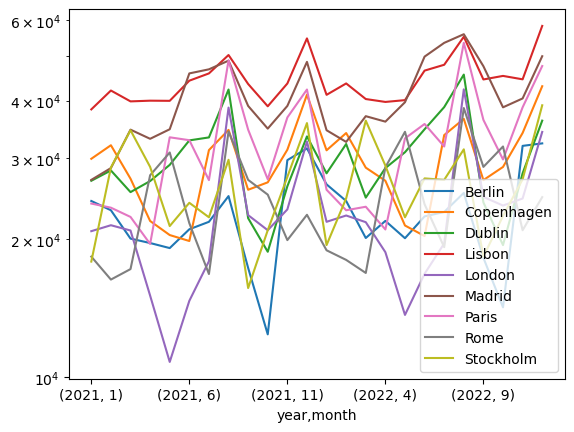

In [12]:
df.plot(logy=True)